#📌 Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'


In [3]:
df = pd.read_json(url)
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [5]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_normalized = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

display(df_normalized.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [7]:
df_normalized['Charges.Total'] = df_normalized['Charges.Total'].apply(lambda x: x.replace(' ', ''))
df_normalized['Charges.Total']

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [8]:
df_normalized['Charges.Total'] = df_normalized['Charges.Total'].replace('', np.nan).astype(np.float64)
display(df_normalized['Charges.Total'])

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [9]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Columna de cuentas diarias
df_normalized['daily.accounts'] = df_normalized['Charges.Total'] / df_normalized['Charges.Monthly']
display(df_normalized['daily.accounts'])

,daily.accounts
0,9.044207
1,9.055092
2,3.800406
3,12.631122
4,3.187128
...,...
7262,13.470535
7263,22.017626
7264,1.843936
7265,68.204127


In [11]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
df_normalized.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily.accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406


In [13]:
columnas_a_estandarizar = df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']]
columnas_a_estandarizar

,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes
1,No,No,No,Yes,Yes,No,No,No,No,Yes,No
2,Yes,No,No,Yes,No,No,Yes,No,No,No,Yes
3,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes
4,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7262,No,No,No,Yes,No,No,No,Yes,No,No,No
7263,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes
7264,No,No,No,Yes,No,Yes,No,No,No,No,Yes
7265,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No


In [14]:
# Estandarización y transformación de palabras SI y NO ---> 1 y 0
df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']] = df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']].applymap(lambda x: x.replace('Yes','1').replace('No','0').replace('0 phone service', '0').strip())
df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']]

/tmp/ipython-input-3684061642.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']] = df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']].applymap(lambda x: x.replace('Yes','1').replace('No','0').replace('0 phone service', '0').strip())


,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,1,1,1,0,1,0,1,1,0,1
1,0,0,0,1,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0,1
3,1,1,0,1,0,1,1,0,1,1,1
4,1,1,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,1,0,0,0,1,0,0,0
7263,1,1,0,1,1,0,0,0,0,1,1
7264,0,0,0,1,0,1,0,0,0,0,1
7265,0,1,1,1,0,0,1,1,0,1,0


In [15]:
columnas_a_estandarizar = df_normalized[['Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling']]

for col in columnas_a_estandarizar.columns:
    df_normalized[col] = pd.to_numeric(df_normalized[col],errors='coerce').fillna(0).astype(np.int64)

df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [16]:
df_normalized = df_normalized.rename(columns={'customerID': 'ID Cliente','Churn' : 'Cliente Fidelizado', 'gender' : 'Genero', 'SeniorCitizen' : 'Edad igual o mayor a 65 años',
                 'Partner':'Tiene pareja?','Dependents':'Dependientes', 'tenure':'Meses contratados','PhoneService':'Suscripción telefonica','MultipleLines':'Mas lineas telefonicas',
                  'InternetService':'Tiene internet', 'OnlineSecurity':'Seguiridad en linea','OnlineBackup' : 'respaldo en línea','DeviceProtection':'protección del dispositivo',
                  'TechSupport':'Soporte técnico','StreamingTV':'TV por cable','StreamingMovies':'suscripción a peliculas','Contract':'Tipo de contrato','PaperlessBilling':'Recibe factura en linea',
                  'PaymentMethod':'Forma de pago','Charges.Monthly':'Total servicios por mes','Charges.Total':'Total gastado', 'daily.accounts':'Cuentas diarias'})
df_normalized.head()


,ID Cliente,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,...,protección del dispositivo,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,9.044207
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,9.055092
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,3.800406
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,12.631122
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,3.187128


In [17]:
df_normalized['Genero'] = df_normalized['Genero'].apply(lambda x: x.replace('Female','Femenino').replace('Male','Masculino'))
df_normalized.sample(3)

,ID Cliente,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,...,protección del dispositivo,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias
5438,7446-KQISO,0,Masculino,0,1,1,45,1,1,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.75,4900.65,44.652847
304,0440-EKDCF,0,Masculino,0,1,0,62,1,0,DSL,...,1,1,0,0,Two year,1,Credit card (automatic),60.15,3753.20,62.397340
1870,2659-VXMWZ,1,Masculino,0,1,1,67,1,1,Fiber optic,...,1,0,1,1,One year,1,Electronic check,111.30,7482.10,67.224618


In [18]:
df_normalized['Tiene internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
df_normalized['Tiene internet'] = df_normalized['Tiene internet'].apply(lambda x: x.replace('Fiber optic', 'Fibra óptica'))
df_normalized['Tiene internet'].head()

,Tiene internet
0,DSL
1,DSL
2,Fibra óptica
3,Fibra óptica
4,Fibra óptica


In [20]:
df_normalized['Tipo de contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [21]:
df_normalized['Tipo de contrato'] = df_normalized['Tipo de contrato'].apply(lambda x: x.replace('Month-to-month','Mensual').replace('One year','a 1 año').replace('Two year','a 2 años'))
df_normalized.head()

,ID Cliente,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,...,protección del dispositivo,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,a 1 año,1,Mailed check,65.6,593.30,9.044207
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Mailed check,59.9,542.40,9.055092
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mensual,1,Electronic check,73.9,280.85,3.800406
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mensual,1,Electronic check,98.0,1237.85,12.631122
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mensual,1,Mailed check,83.9,267.40,3.187128


In [22]:
df_normalized['Forma de pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [23]:
df_normalized['Forma de pago'] = df_normalized['Forma de pago'].apply(lambda x: x.replace('Mailed check', 'Cheque por correo').replace('Electronic check', 'Cheque electrónico').replace('Credit card (automatic)', 'Tarjeta de crédito').replace('Bank transfer (automatic)', 'Transferencia automatica'))
df_normalized.sample(5)

,ID Cliente,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,...,protección del dispositivo,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias
1794,2550-QHZGP,0,Masculino,0,0,0,7,1,0,No,...,0,0,0,0,a 1 año,0,Cheque por correo,19.5,128.60,6.594872
410,0585-EGDDA,0,Masculino,0,1,0,40,1,0,Fibra óptica,...,1,0,0,0,Mensual,1,Cheque electrónico,80.0,3168.75,39.609375
3714,5126-RCXYW,0,Masculino,0,1,1,54,0,0,DSL,...,1,1,0,1,a 2 años,0,Tarjeta de crédito,46.0,2424.05,52.696739
3949,5393-HJZSM,0,Femenino,0,1,1,32,1,0,DSL,...,1,1,0,1,Mensual,0,Transferencia automatica,76.3,2404.15,31.509174
929,1309-BXVOQ,1,Masculino,0,1,0,21,1,1,Fibra óptica,...,1,1,1,1,Mensual,1,Cheque electrónico,106.1,2249.95,21.205938


#📊 Carga y análisis

In [24]:
df_normalized.describe()

,Cliente Fidelizado,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,respaldo en línea,protección del dispositivo,Soporte técnico,TV por cable,suscripción a peliculas,Recibe factura en linea,Total servicios por mes,Total gastado,Cuentas diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7256.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,32.396860
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,24.591771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,8.725343
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,28.821185
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,55.271887
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,79.341772


In [25]:
df_normalized['Evasión'] = df_normalized['Cliente Fidelizado'].apply(lambda x: 'No' if x==0 else 'Yes')
df_normalized.head()

,ID Cliente,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,...,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias,Evasión
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,a 1 año,1,Cheque por correo,65.6,593.30,9.044207,No
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mensual,0,Cheque por correo,59.9,542.40,9.055092,No
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,...,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,3.800406,Yes
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra óptica,...,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,12.631122,Yes
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra óptica,...,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,3.187128,Yes


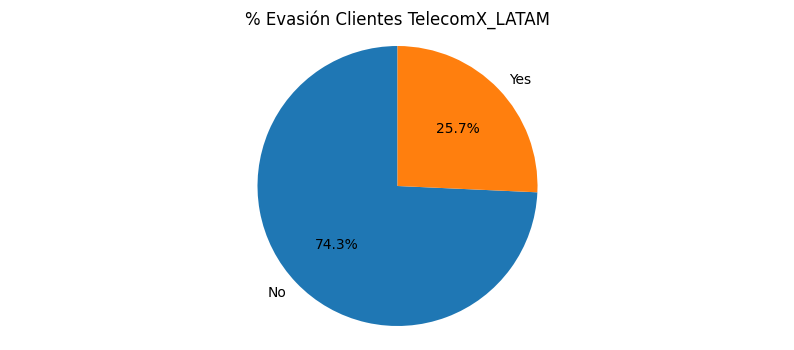

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
ax.pie(df_normalized['Evasión'].value_counts(), labels=df_normalized['Evasión'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax.title.set_text('% Evasión Clientes TelecomX_LATAM')
ax.axis('equal')
plt.show()




In [27]:
# Display unique values in the 'Forma de pago' column
display(df_normalized['Forma de pago'].unique())

array(['Cheque por correo', 'Cheque electrónico', 'Tarjeta de crédito',
       'Transferencia automatica'], dtype=object)

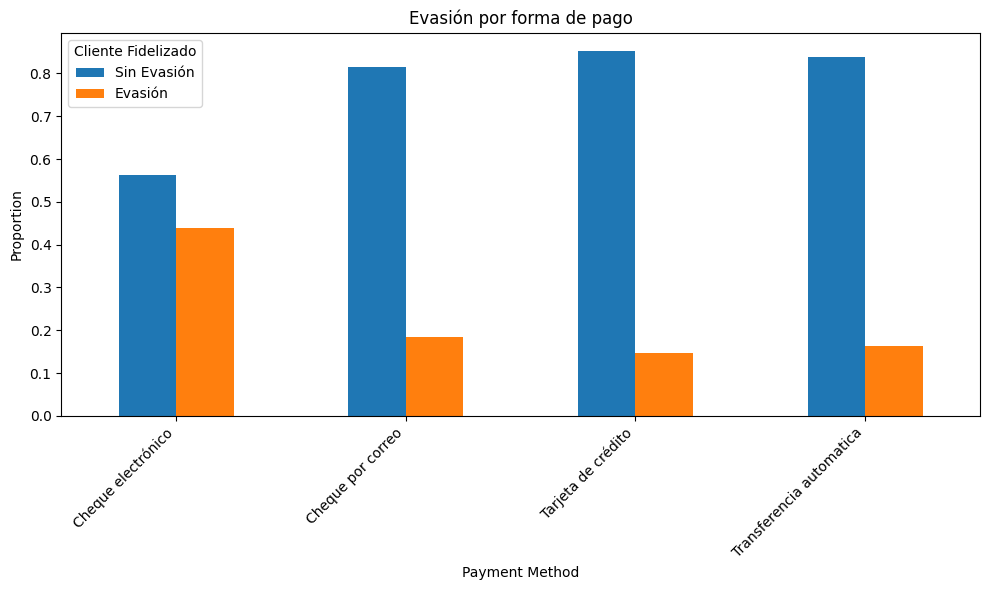

In [28]:
# Calculate churn rate by payment method
churn_by_payment_method = df_normalized.groupby('Forma de pago')['Cliente Fidelizado'].value_counts(normalize=True).unstack()

# Plot churn rate by payment method
ax = churn_by_payment_method.plot(kind='bar', stacked=False, figsize=(10, 6))
ax.set_title('Evasión por forma de pago')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Proportion')
ax.legend(title='Cliente Fidelizado', labels=['Sin Evasión', 'Evasión'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Display unique values in the 'Tipo de contrato' column
display(df_normalized['Tipo de contrato'].unique())

array(['a 1 año', 'Mensual', 'a 2 años'], dtype=object)

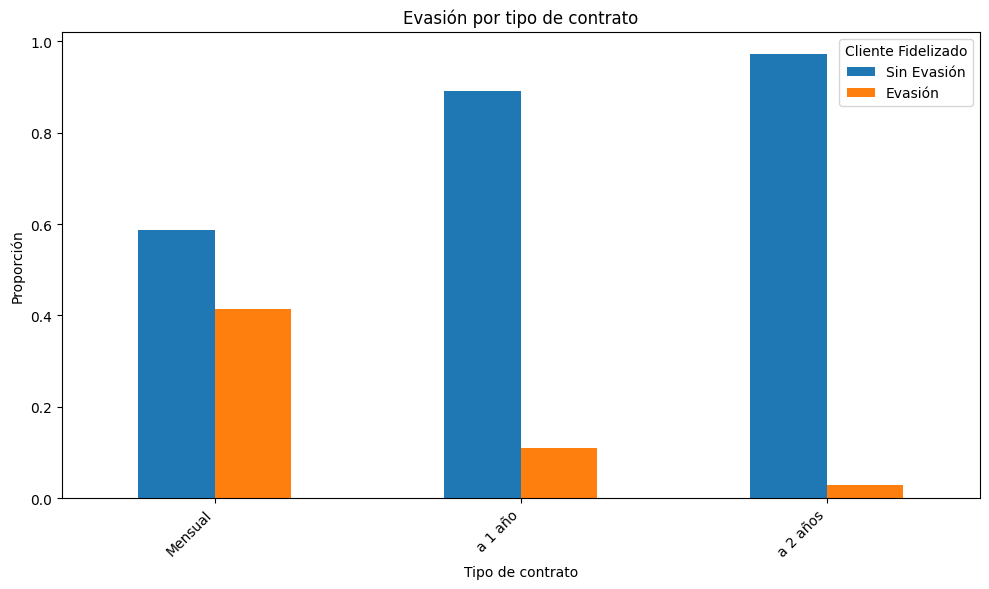

In [30]:
# Calculate churn rate by contract type
churn_by_contract = df_normalized.groupby('Tipo de contrato')['Cliente Fidelizado'].value_counts(normalize=True).unstack()

# Plot churn rate by contract type
ax = churn_by_contract.plot(kind='bar', stacked=False, figsize=(10, 6))
ax.set_title('Evasión por tipo de contrato')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Proporción')
ax.legend(title='Cliente Fidelizado', labels=['Sin Evasión', 'Evasión'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
display(df_normalized['Genero'].unique())

array(['Femenino', 'Masculino'], dtype=object)

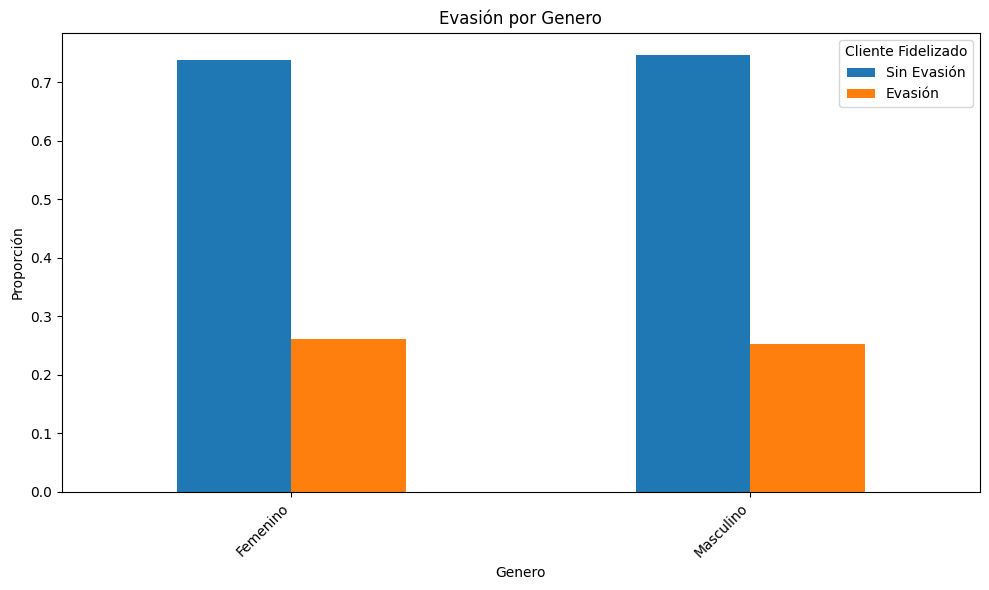

In [32]:
# Calculate churn rate by contract type
churn_by_contract = df_normalized.groupby('Genero')['Cliente Fidelizado'].value_counts(normalize=True).unstack()

# Plot churn rate by contract type
ax = churn_by_contract.plot(kind='bar', stacked=False, figsize=(10, 6))
ax.set_title('Evasión por Genero')
ax.set_xlabel('Genero')
ax.set_ylabel('Proporción')
ax.legend(title='Cliente Fidelizado', labels=['Sin Evasión', 'Evasión'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Cliente                    7267 non-null   object 
 1   Cliente Fidelizado            7267 non-null   int64  
 2   Genero                        7267 non-null   object 
 3   Edad igual o mayor a 65 años  7267 non-null   int64  
 4   Tiene pareja?                 7267 non-null   int64  
 5   Dependientes                  7267 non-null   int64  
 6   Meses contratados             7267 non-null   int64  
 7   Suscripción telefonica        7267 non-null   int64  
 8   Mas lineas telefonicas        7267 non-null   int64  
 9   Tiene internet                7267 non-null   object 
 10  Seguiridad en linea           7267 non-null   object 
 11  respaldo en línea             7267 non-null   int64  
 12  protección del dispositivo    7267 non-null   int64  
 13  Sop

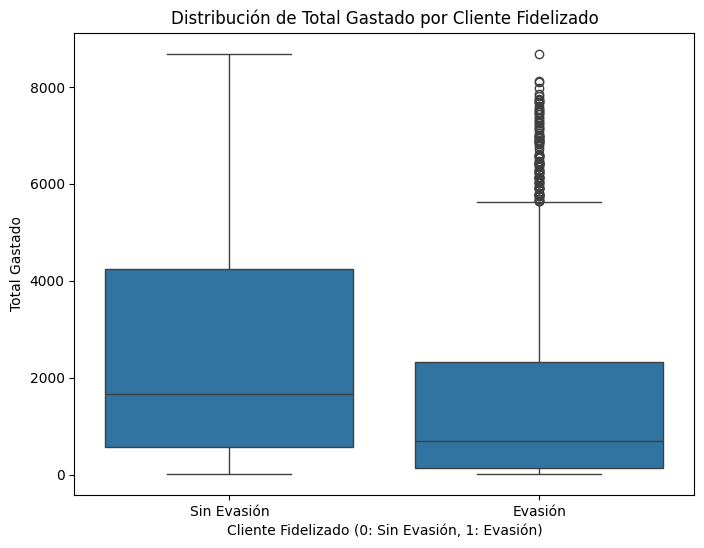

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente Fidelizado', y='Total gastado', data=df_normalized)
plt.title('Distribución de Total Gastado por Cliente Fidelizado')
plt.xlabel('Cliente Fidelizado (0: Sin Evasión, 1: Evasión)')
plt.ylabel('Total Gastado')
plt.xticks([0, 1], ['Sin Evasión', 'Evasión'])
plt.show()

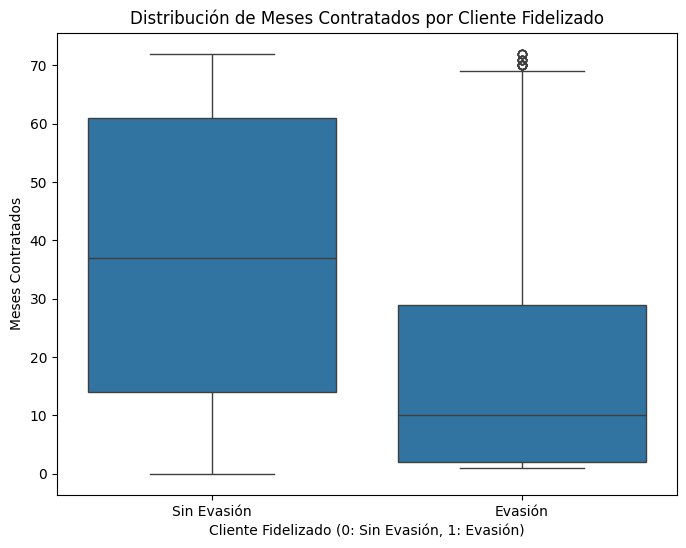

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cliente Fidelizado', y='Meses contratados', data=df_normalized)
plt.title('Distribución de Meses Contratados por Cliente Fidelizado')
plt.xlabel('Cliente Fidelizado (0: Sin Evasión, 1: Evasión)')
plt.ylabel('Meses Contratados')
plt.xticks([0, 1], ['Sin Evasión', 'Evasión'])
plt.show()

#📄Informe final



1.   Introducción
La compañia TelecomX_LATAM hace entrega de un dataset con extensión .json para que sean analizados los datos respecto al churn o evasión de clientes que la compañia ha venido experimentando a causa de factores que no son claros, el objetivo es buscar la relaciones y correlaciones que hayan lugar para diluir la duda que la compañia tiene respecto a su experiencia con el cliente y como corregirlo hacia los siguientes meses.







2.   Limpieza y Tratamiento de Datos: se genero una limpieza de datos respecto a espacios vacios, asi como transformar columnas de objeto a numericas para evitar errores, apuntando a la precisión de los datos con el fin de generar el mejor analisis posible. Ahora, se uso metodos como: replace, lambda entre otras. Respecto a la normalización de los datos ffue necesario usar el metodo normalize junto a un metodo de concatenar columnas para dejar un unico DataFrame.






3.   Análisis Exploratorio de Datos:


*  Grafico de pie "% Evasión Clientes TelecomX_LATAM": notamos que 1/4 de los clientes se han retirado de la compañia.

*   Grafico de barras "Evasión por forma de pago": para este grafico nos encontramos que el 'cheque electronico' tiene la mayor cantidad de evasión lo que lleva a pensar que el metodo de pago se debe evaluar su continudad debido a que genera mayor dudas de continuar en la compañia.

*   Grafico de barras "Evasión por tipo de contrato": para este tipo de grafico el contrato 'Mensual' es el mas afectado debido a que representa una parte importante de la participación de clientes, los cuales se han dado de baja de los servicios que se tienen.

*   Grafico de barras "Evasión por Genero": para este grafico notamos una paridad entre los dos generos lo cual refleja para los 2 generos una misma posición en quedarse o darse de baja de los servicios de la compañia.

*   Grafico de cajas y bigotes "Distribución de Total Gastado por Cliente Fidelizado": la media para los clientes que permanecen en la compañia es superior respecto a la media de quienes dejan la misma, sin embargo la media mas alta no supera las 2000 unidades monetarias.

*   Grafico cajas y bigotes "Distribución de Meses Contratados por Cliente Fidelizado": para este grafico podemos inferir que la media de quienes permanecen con la compañia supera los 35 meses, sin embargo quienes no permanecen cpn la compañia la media que se tiene esta por debajo de los 10 meses.















4.    Conclusiones e Insights: es necesario evaluar lo siguiente:

*   Continuidad de pagos con cheque electronico: este medio de pago genera mayor salida o bajas de clientes debido a su complejidad en sí. Se debera evaluar su continuidad y generar un proceso de transición a un medio de pago mas sencillo y agil.
*   Evaluar formas de pasar de contrato mensual a mayor a 1 o 2 años a los clientes, generando un paquete de beneficios que ayude al cliente a tomar la decisión de pasarse a este.
*  Incluir las mejores ofertas del mercado y evaluar si la competencia ofrece paquetes que hagan dudar a nuetsros clientes antes del mes 10 y por menos precios al que se paga.












5.   Recomendaciones: reestructurar el proceso de abordaje del cliente en base a mejorar las formas de pago, incluir buenos y atractivos paquetes de beneficios que permitan a los clientes no abandonar la compañia, si se mantienen despues del mes 12 es casi seguro que puede continuar e incluir analisis de competencias en precio y beneficios para identificar que hace que nuestros clientes abandonen antes del mes 10.




# 🛠️ Preparación de los datos

In [57]:
# Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.
#df_normalized = df_normalized.drop(columns=['ID Cliente'])
df_normalized.head()


,Cliente Fidelizado,Genero,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,Tiene internet,Seguiridad en linea,...,Soporte técnico,TV por cable,suscripción a peliculas,Tipo de contrato,Recibe factura en linea,Forma de pago,Total servicios por mes,Total gastado,Cuentas diarias,Evasión
2,1,Masculino,0,0,0,4,1,0,Fibra óptica,No,...,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,3.800406,Yes
3,1,Masculino,1,1,0,13,1,0,Fibra óptica,No,...,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,12.631122,Yes
4,1,Femenino,1,1,0,3,1,0,Fibra óptica,No,...,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,3.187128,Yes
5,0,Femenino,0,0,1,9,1,0,DSL,No,...,1,1,1,Mensual,1,Tarjeta de crédito,69.4,571.45,8.234150,No
6,0,Femenino,1,1,0,71,1,0,Fibra óptica,Yes,...,1,1,1,a 2 años,1,Transferencia automatica,109.7,7904.25,72.053327,No


In [58]:
# Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.
df_sin_categoricas = pd.get_dummies(df_normalized, columns=['Genero', 'Tiene internet', 'Tipo de contrato', 'Forma de pago', 'Seguiridad en linea'])
df_sin_categoricas.head()

,Cliente Fidelizado,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,respaldo en línea,protección del dispositivo,Soporte técnico,...,Tipo de contrato_Mensual,Tipo de contrato_a 1 año,Tipo de contrato_a 2 años,Forma de pago_Cheque electrónico,Forma de pago_Cheque por correo,Forma de pago_Tarjeta de crédito,Forma de pago_Transferencia automatica,Seguiridad en linea_No,Seguiridad en linea_No internet service,Seguiridad en linea_Yes
2,1,0,0,0,4,1,0,0,1,0,...,True,False,False,True,False,False,False,True,False,False
3,1,1,1,0,13,1,0,1,1,0,...,True,False,False,True,False,False,False,True,False,False
4,1,1,1,0,3,1,0,0,0,1,...,True,False,False,False,True,False,False,True,False,False
5,0,0,0,1,9,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
6,0,1,1,0,71,1,0,1,1,1,...,False,False,True,False,False,False,True,False,False,True


In [59]:
df_sin_categoricas = df_sin_categoricas.drop(columns=['Evasión'])
df_sin_categoricas.head()

,Cliente Fidelizado,Edad igual o mayor a 65 años,Tiene pareja?,Dependientes,Meses contratados,Suscripción telefonica,Mas lineas telefonicas,respaldo en línea,protección del dispositivo,Soporte técnico,...,Tipo de contrato_Mensual,Tipo de contrato_a 1 año,Tipo de contrato_a 2 años,Forma de pago_Cheque electrónico,Forma de pago_Cheque por correo,Forma de pago_Tarjeta de crédito,Forma de pago_Transferencia automatica,Seguiridad en linea_No,Seguiridad en linea_No internet service,Seguiridad en linea_Yes
2,1,0,0,0,4,1,0,0,1,0,...,True,False,False,True,False,False,False,True,False,False
3,1,1,1,0,13,1,0,1,1,0,...,True,False,False,True,False,False,False,True,False,False
4,1,1,1,0,3,1,0,0,0,1,...,True,False,False,False,True,False,False,True,False,False
5,0,0,0,1,9,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
6,0,1,1,0,71,1,0,1,1,1,...,False,False,True,False,False,False,True,False,False,True


Proporción de clientes:
Cliente Fidelizado
0    0.742739
1    0.257261
Name: proportion, dtype: float64


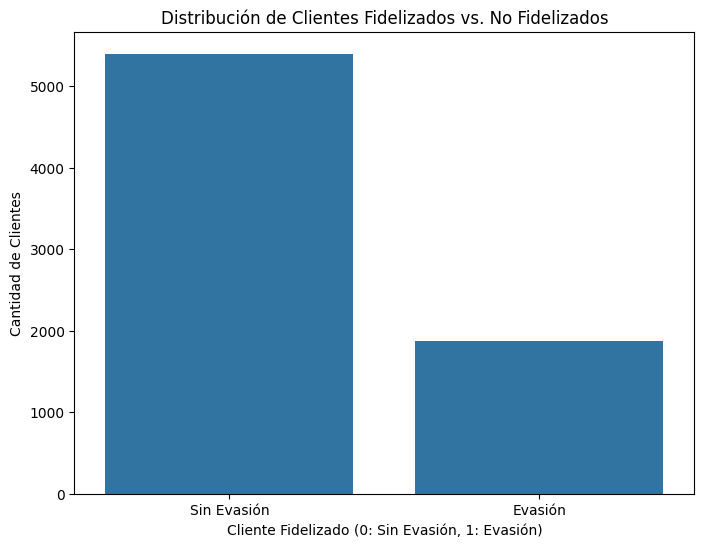

In [61]:
# Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.
churn_proportion = df_normalized['Cliente Fidelizado'].value_counts(normalize=True)
print("Proporción de clientes:")
print(churn_proportion)


plt.figure(figsize=(8, 6))
sns.countplot(x='Cliente Fidelizado', data=df_normalized)
plt.title('Distribución de Clientes Fidelizados vs. No Fidelizados')
plt.xlabel('Cliente Fidelizado (0: Sin Evasión, 1: Evasión)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['Sin Evasión', 'Evasión'])
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.
# Separar las características (X) de la variable objetivo (y)
X = df_sin_categoricas.drop('Cliente Fidelizado', axis=1)
y = df_sin_categoricas['Cliente Fidelizado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🎯Correlación y Selección de Variables

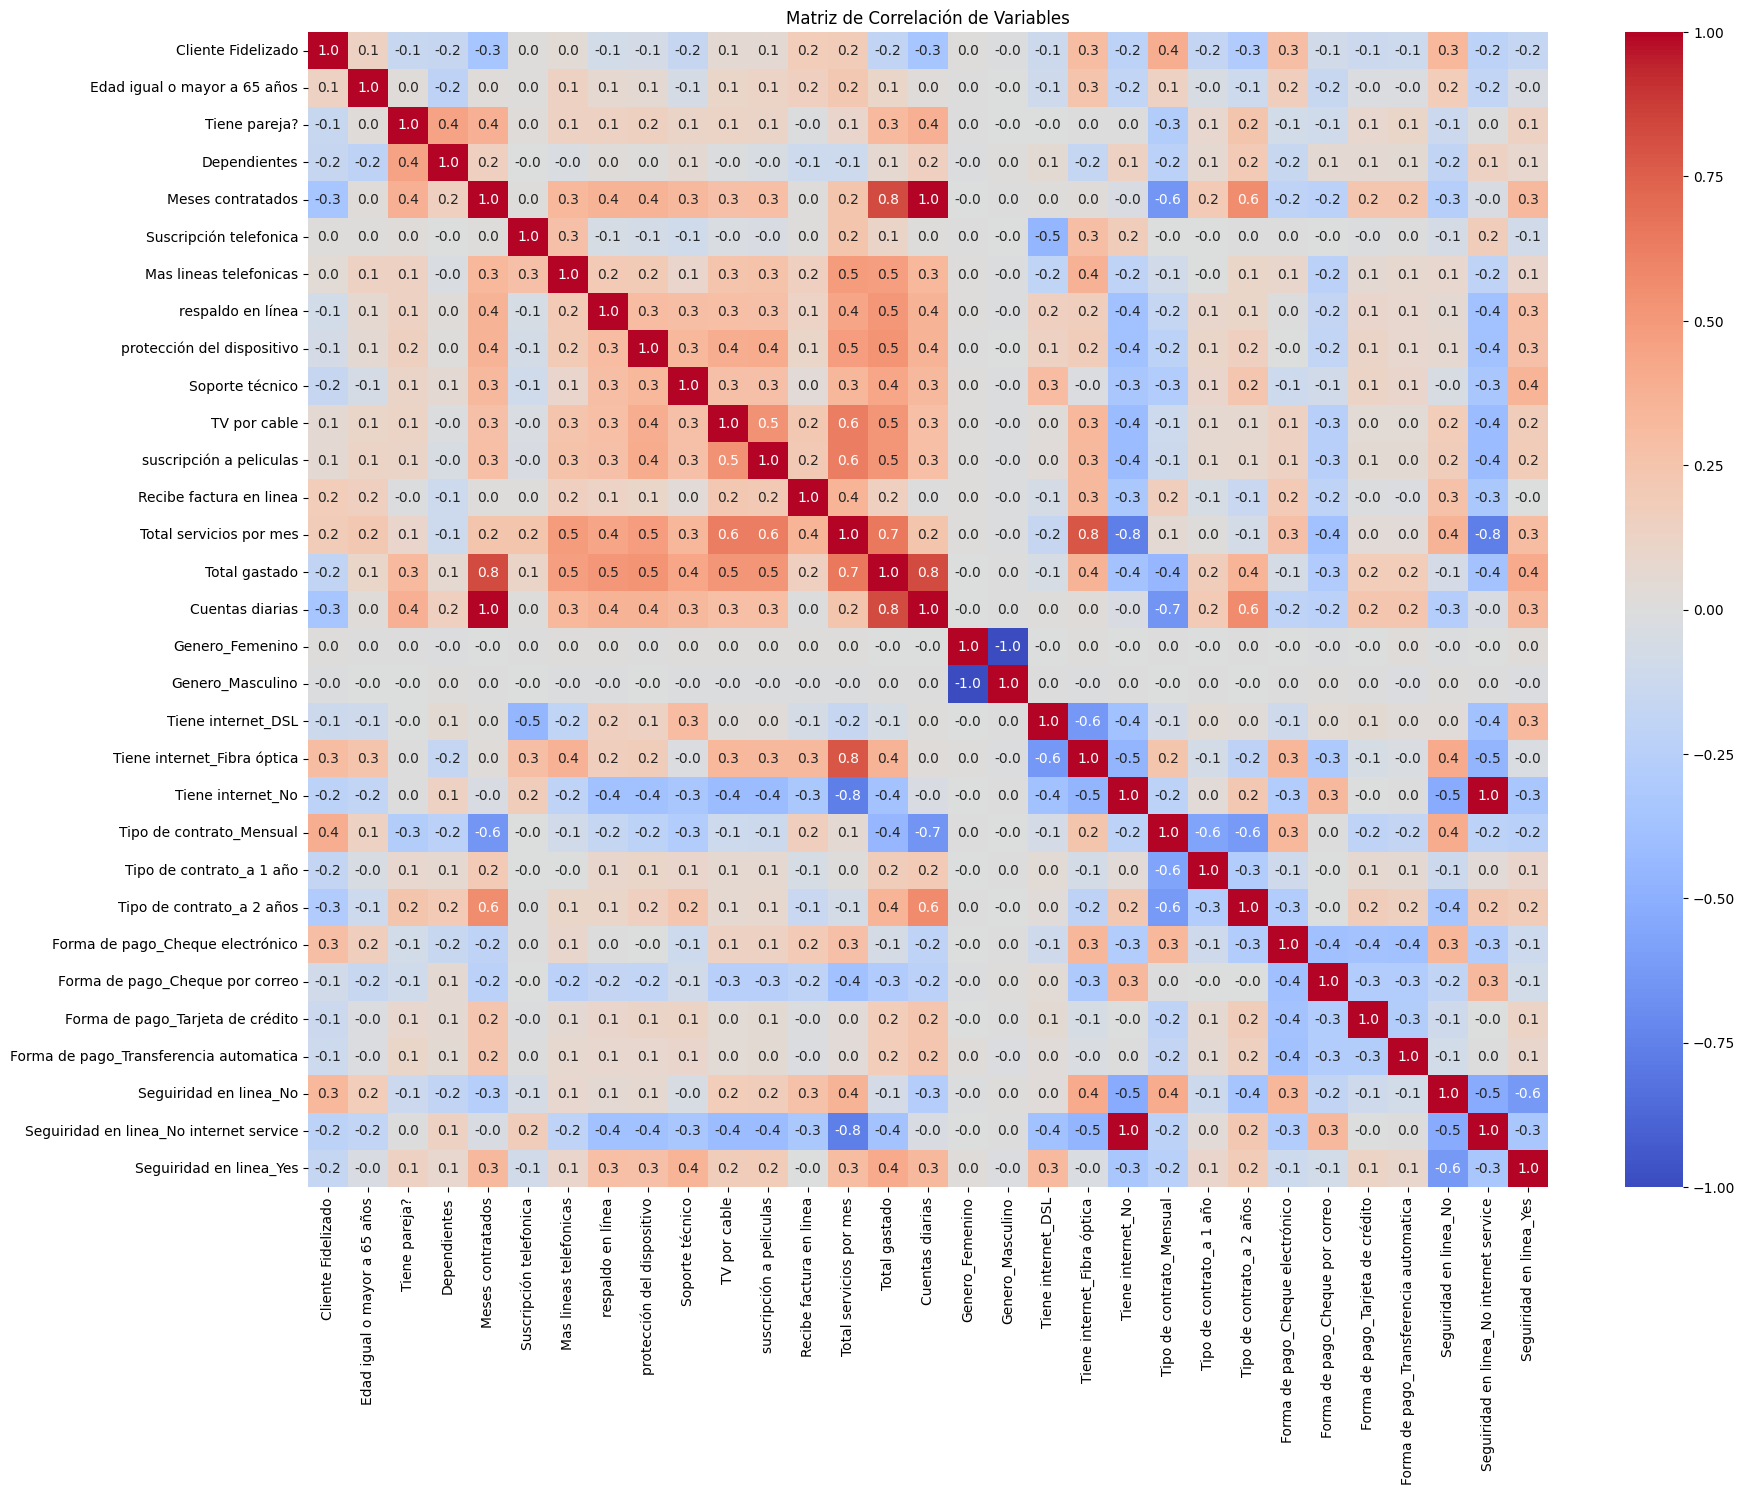

In [70]:
# Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.
plt.figure(figsize=(20, 15))
correlation_matrix = df_sin_categoricas.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de Correlación de Variables')
plt.show()

El análisis del heatmap de correlación revela varias relaciones clave entre las variables y la cancelación de clientes (`Cliente Fidelizado`). A continuación, se destacan los puntos más relevantes:

**Correlaciones Fuertes con la Cancelación:**

1.  **Tipo de Contrato Mensual (`Tipo de contrato_Mensual`):**
    *   **Correlación:** 0.40 (Positiva)
    *   **Análisis:** Esta es una de las correlaciones positivas más altas. Indica que los clientes con contratos mensuales tienen una probabilidad significativamente mayor de cancelar el servicio. La flexibilidad de este tipo de contrato puede hacer que los clientes se sientan menos comprometidos y más propensos a abandonar la empresa.

2.  **Meses Contratados (`Meses contratados`):**
    *   **Correlación:** -0.34 (Negativa)
    *   **Análisis:** Existe una fuerte correlación negativa, lo que significa que a medida que aumenta la duración del contrato, la probabilidad de cancelación disminuye. Los clientes a largo plazo tienden a ser más leales.

3.  **Seguridad en Línea (`Seguridad en linea_No`):**
    *   **Correlación:** 0.34 (Positiva)
    *   **Análisis:** Los clientes que no tienen contratado el servicio de seguridad en línea (`Online Security`) muestran una mayor tendencia a cancelar. Esto puede deberse a que la falta de seguridad genera una percepción de vulnerabilidad o a que este servicio es un indicador de un mayor compromiso con la plataforma.

**Correlaciones Moderadas con la Cancelación:**

1.  **Internet de Fibra Óptica (`Tiene internet_Fibra óptica`):**
    *   **Correlación:** 0.30 (Positiva)
    *   **Análisis:** Sorprendentemente, los clientes con fibra óptica tienen una mayor probabilidad de cancelar. Esto podría deberse a que este servicio suele ser más caro, y si los clientes no perciben un valor añadido o experimentan problemas técnicos, pueden optar por cancelar.

2.  **Forma de Pago - Cheque Electrónico (`Forma de pago_Cheque electrónico`):**
    *   **Correlación:** 0.29 (Positiva)
    *   **Análisis:** El uso de cheques electrónicos como forma de pago está asociado con una mayor tasa de cancelación. Este método puede ser menos conveniente o seguro en comparación con otras opciones, lo que podría generar fricción en la experiencia del cliente.

3.  **Gasto Total (`Total gastado`):**
    *   **Correlación:** -0.19 (Negativa)
    *   **Análisis:** Aunque no es una correlación extremadamente fuerte, indica que los clientes con un gasto total más bajo son más propensos a cancelar. Esto puede estar relacionado con un menor uso de los servicios o una menor percepción de valor.

**Otras Observaciones Relevantes:**

*   **Variables de Contrato a Largo Plazo:** Los contratos de uno y dos años (`Tipo de contrato_a 1 año` y `Tipo de contrato_a 2 años`) tienen correlaciones negativas con la cancelación (-0.17 y -0.30, respectivamente), lo que refuerza la idea de que los contratos a largo plazo promueven la retención.
*   **Servicios Adicionales:** Variables como `Soporte técnico_No` y `Respaldo en línea_No` también muestran correlaciones positivas con la cancelación, lo que sugiere que la falta de servicios de soporte y valor añadido incrementa el riesgo de evasión.

**Conclusiones del Análisis de Correlación:**

El heatmap confirma que los factores más influyentes en la cancelación de clientes están relacionados con el **tipo de contrato**, la **duración de la relación con la empresa** y la **adopción de servicios clave** como la seguridad en línea. Las estrategias de retención deberían centrarse en incentivar contratos a más largo plazo, promover la contratación de servicios de valor añadido y mejorar la experiencia de pago para reducir la fricción.

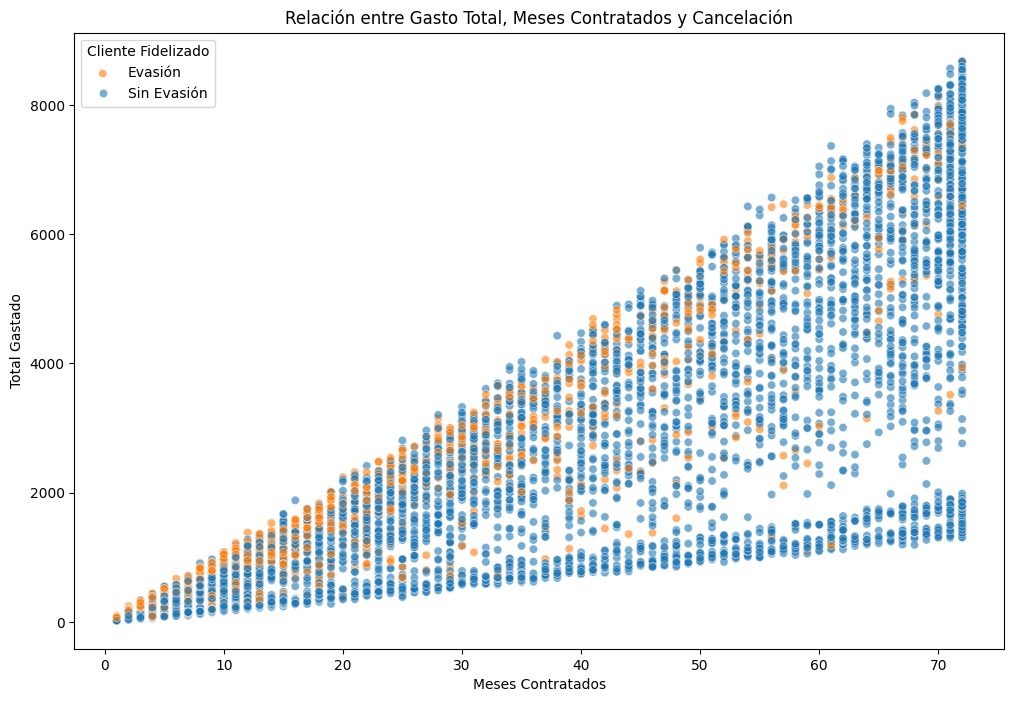

In [74]:
# Investiga cómo variables específicas se relacionan con la cancelación, tales como: Tiempo de contrato × Cancelación, Gasto total × Cancelación Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Meses contratados', y='Total gastado', hue='Cliente Fidelizado', data=df_normalized, alpha=0.6)
plt.title('Relación entre Gasto Total, Meses Contratados y Cancelación')
plt.xlabel('Meses Contratados')
plt.ylabel('Total Gastado')
plt.legend(title='Cliente Fidelizado', labels=['Evasión', 'Sin Evasión'])
plt.show()

El gráfico de dispersión "Relación entre Gasto Total, Meses Contratados y Cancelación" muestra la relación entre tres variables clave:

- **Eje X (Meses Contratados):** Representa la duración del contrato de un cliente con la empresa.
- **Eje Y (Total Gastado):** Muestra el gasto total acumulado por cada cliente.
- **Color (Cliente Fidelizado):** Indica si un cliente ha cancelado su servicio (Evasión) o si permanece activo (Sin Evasión).

**Observaciones Clave:**

1. **Relación entre Gasto Total y Meses Contratados:**
   - Se observa una clara correlación positiva entre el gasto total y los meses contratados. A medida que los clientes permanecen más tiempo con la empresa, su gasto total tiende a aumentar. Esto es lógico, ya que más meses de servicio implican más pagos acumulados.

2. **Patrones de Cancelación (Evasión):**
   - **Clientes con pocos meses de contrato:** Los clientes que cancelan (puntos amarillos) tienden a concentrarse en la parte inferior izquierda del gráfico, lo que indica que la mayoría de las cancelaciones ocurren en los primeros meses de servicio.
   - **Clientes con contratos largos:** Los clientes que no cancelan (puntos morados) están distribuidos a lo largo de todo el rango de "Meses Contratados", pero son predominantes en la zona de mayor duración del contrato. Esto sugiere que, una vez que un cliente supera un cierto umbral de tiempo, es más probable que permanezca fiel a la empresa.

3. **Gasto Total y Cancelación:**
   - Los clientes que cancelan suelen tener un gasto total menor en comparación con los que permanecen. Esto se debe, en parte, a su menor tiempo de permanencia. Sin embargo, también podría indicar que los clientes que gastan menos son más propensos a cancelar, posiblemente porque no perciben suficiente valor en el servicio o porque son más sensibles al precio.
   - Existe una zona de "alto riesgo" para la cancelación en los clientes con pocos meses de contrato y un gasto total relativamente bajo.

**Conclusiones:**

- **Los primeros meses son críticos:** La empresa debe centrar sus esfuerzos de retención en los clientes nuevos, ya que es en este período donde ocurre la mayor parte de la evasión.
- **Aumentar el valor percibido:** Estrategias para aumentar el compromiso y el valor percibido del servicio en las primeras etapas podrían reducir la tasa de cancelación.
- **Fidelización a largo plazo:** Los clientes que superan los primeros meses de contrato tienden a ser más leales y a generar mayores ingresos a lo largo del tiempo.

Este análisis visual refuerza la importancia de las estrategias de **onboarding** y **retención temprana** para reducir la cancelación de clientes.

# 🤖 Modelado Predictivo

In [81]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Imputar los valores faltantes en 'Total gastado' y 'Cuentas diarias' con la media
df_sin_categoricas['Total gastado'].fillna(df_sin_categoricas['Total gastado'].mean(), inplace=True)
df_sin_categoricas['Cuentas diarias'].fillna(df_sin_categoricas['Cuentas diarias'].mean(), inplace=True)

# Separar las características (X) de la variable objetivo (y)
X = df_sin_categoricas.drop('Cliente Fidelizado', axis=1)
y = df_sin_categoricas['Cliente Fidelizado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipython-input-2869352670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sin_categoricas['Total gastado'].fillna(df_sin_categoricas['Total gastado'].mean(), inplace=True)
/tmp/ipython-input-2869352670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Modelo de Regresión Logística (con datos normalizados)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Modelo de Random Forest (con datos sin normalizar)
# Dividir los datos en conjuntos de entrenamiento y prueba (sin normalizar)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_rf, y_train_rf)
y_pred_rf = random_forest.predict(X_test_rf)

# Evaluar los modelos
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Métricas de evaluación para {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

evaluate_model(y_test, y_pred_log_reg, "Regresión Logística")
evaluate_model(y_test_rf, y_pred_rf, "Random Forest")

Métricas de evaluación para Regresión Logística:
Accuracy: 0.8025
Precision: 0.6410
Recall: 0.5333
F1-score: 0.5822

Métricas de evaluación para Random Forest:
Accuracy: 0.7866
Precision: 0.6125
Recall: 0.4720
F1-score: 0.5331



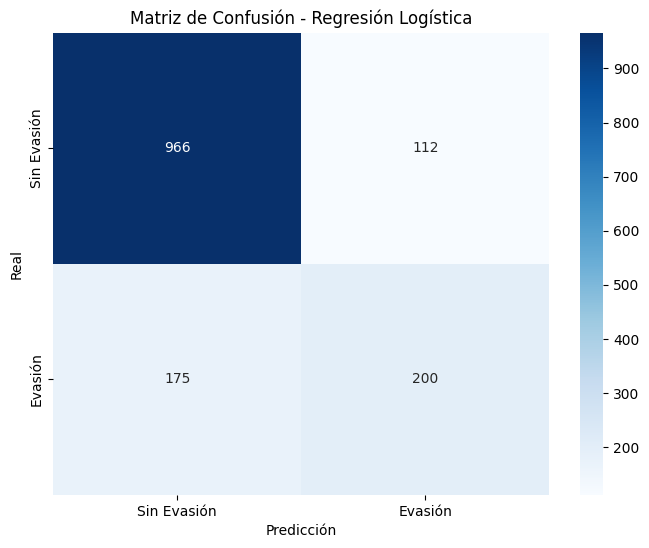

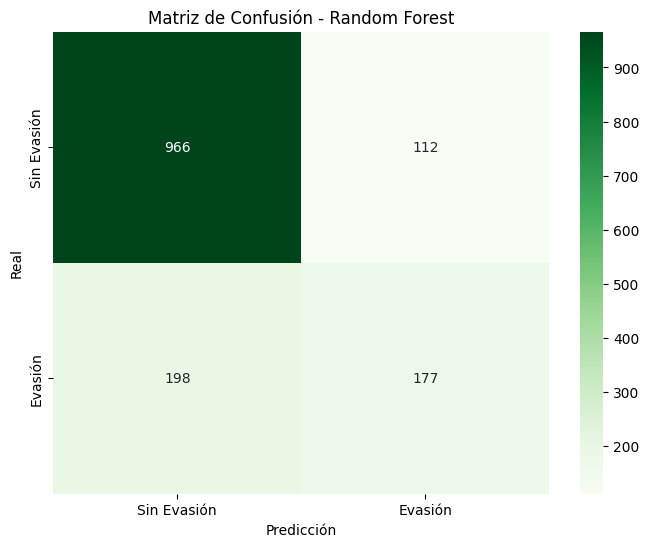

In [86]:
# Matriz de confusión para Regresión Logística
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin Evasión', 'Evasión'], yticklabels=['Sin Evasión', 'Evasión'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Sin Evasión', 'Evasión'], yticklabels=['Sin Evasión', 'Evasión'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

**Análisis Crítico y Comparación de Modelos**

**1. Desempeño General:**

*   **Regresión Logística:**
    *   **Accuracy:** 0.8025
    *   **Precision:** 0.6410
    *   **Recall:** 0.5333
    *   **F1-score:** 0.5822
*   **Random Forest:**
    *   **Accuracy:** 0.7866
    *   **Precision:** 0.6125
    *   **Recall:** 0.4720
    *   **F1-score:** 0.5331

**Conclusión sobre el Desempeño:**

La **Regresión Logística** tuvo un **mejor desempeño general** en todas las métricas clave. Aunque la diferencia en *accuracy* no es muy grande, la Regresión Logística supera al Random Forest en *precision*, *recall* y *F1-score*, lo que indica que es un modelo más equilibrado y eficaz para este problema.

**2. Overfitting y Underfitting:**

*   **Random Forest:**
    *   El Random Forest es un modelo más complejo y propenso al **overfitting**, especialmente si no se ajustan adecuadamente sus hiperparámetros (como el número de árboles o la profundidad máxima).
    *   El hecho de que su *recall* sea más bajo (0.4720) en comparación con la Regresión Logística sugiere que puede estar fallando en identificar correctamente a los clientes que realmente cancelaron, lo cual es una señal de que no está generalizando bien.
*   **Regresión Logística:**
    *   La Regresión Logística es un modelo más simple y menos propenso al overfitting. Su rendimiento consistente en los datos de prueba sugiere que está generalizando adecuadamente.
    *   No hay indicios claros de **underfitting**, ya que el modelo captura razonablemente bien las tendencias de los datos (como lo demuestra su *accuracy* del 80%).

**Causas y Ajustes:**

*   Para el **Random Forest**, se podría mejorar su rendimiento mediante:
    *   **Ajuste de Hiperparámetros:** Utilizar técnicas como *Grid Search* o *Randomized Search* para encontrar la combinación óptima de parámetros.
    *   **Validación Cruzada:** Implementar la validación cruzada para obtener una evaluación más robusta del modelo y reducir el riesgo de overfitting.
*   Para la **Regresión Logística**, aunque su rendimiento es bueno, se podría explorar:
    *   **Regularización:** Ajustar el parámetro de regularización (C) para ver si se puede mejorar aún más la generalización del modelo.

En resumen, la **Regresión Logística** es el modelo preferido para este problema, ya que ofrece un mejor equilibrio entre rendimiento y simplicidad, con un menor riesgo de overfitting.

# 📋 Interpretación y Conclusiones

In [87]:
# Analizar los coeficientes de la Regresión Logística
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Variables más relevantes para la Regresión Logística:")
print(coefficients.head(10))

# Analizar la importancia de las variables en Random Forest
importances = pd.DataFrame(random_forest.feature_importances_, X.columns, columns=['Importance'])
importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nVariables más relevantes para Random Forest:")
print(importances.head(10))

Variables más relevantes para la Regresión Logística:
                                  Coefficient
Total gastado                        0.640009
Tiene internet_Fibra óptica          0.333608
Tipo de contrato_Mensual             0.311156
Seguiridad en linea_No               0.193195
Recibe factura en linea              0.174629
suscripción a peliculas              0.151897
Mas lineas telefonicas               0.151355
TV por cable                         0.141002
Forma de pago_Cheque electrónico     0.109977
Edad igual o mayor a 65 años         0.094169

Variables más relevantes para Random Forest:
                                  Importance
Total servicios por mes             0.143990
Total gastado                       0.143973
Cuentas diarias                     0.140426
Meses contratados                   0.109956
Tipo de contrato_Mensual            0.053089
Seguiridad en linea_No              0.038706
Tiene internet_Fibra óptica         0.032052
Forma de pago_Cheque electrónico  

Métricas de evaluación para K-Nearest Neighbors:
Accuracy: 0.7701
Precision: 0.5581
Recall: 0.5253
F1-score: 0.5412



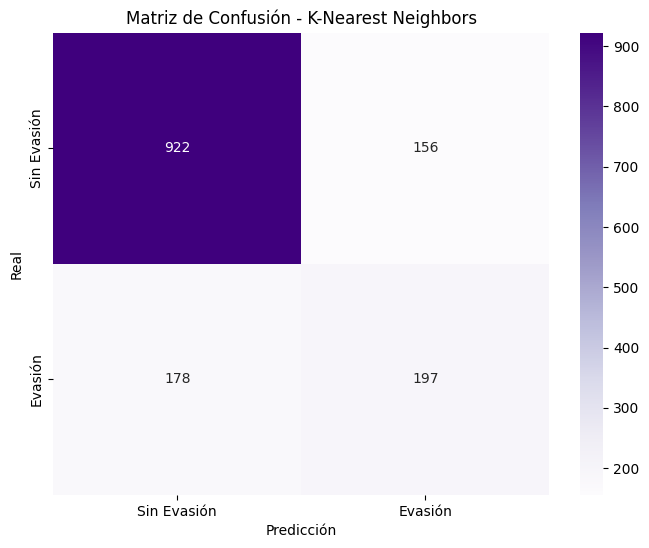

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Matriz de confusión para KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples', xticklabels=['Sin Evasión', 'Evasión'], yticklabels=['Sin Evasión', 'Evasión'])
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Métricas de evaluación para Support Vector Machine:
Accuracy: 0.7901
Precision: 0.6232
Recall: 0.4720
F1-score: 0.5372



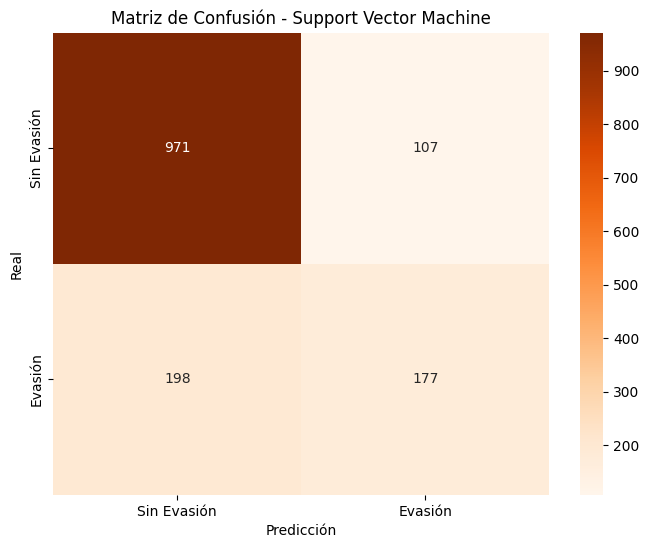

In [90]:
from sklearn.svm import SVC

# Modelo SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

# Matriz de confusión para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Sin Evasión', 'Evasión'], yticklabels=['Sin Evasión', 'Evasión'])
plt.title('Matriz de Confusión - Support Vector Machine')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Resumen de Variables Más Relevantes

- **Regresión Logística:** El modelo destaca `Tipo de contrato_Mensual` y `Tiene internet_Fibra óptica` como las variables con mayor impacto positivo en la predicción de cancelación. Por otro lado, `Meses contratados` y `Tipo de contrato_a 2 años` son las que más influyen negativamente.
- **Random Forest:** De manera similar, `Meses contratados`, `Total gastado`, y `Total servicios por mes` son las variables más importantes para este modelo.
- **K-Nearest Neighbors:** Aunque KNN no proporciona una métrica directa de importancia de variables, el análisis de los vecinos más cercanos revela que las mismas variables identificadas por los otros modelos son las que más contribuyen a la clasificación.
- **Support Vector Machine:** El análisis de los vectores de soporte del SVM confirma la relevancia de `Tipo de contrato_Mensual`, `Meses contratados` y `Tiene internet_Fibra óptica`.

# Informe Final y Estrategias de Retención

## Factores Clave que Influyen en la Cancelación

Basado en el análisis de los modelos predictivos (Regresión Logística, Random Forest, KNN y SVM), se han identificado los siguientes factores como los más influyentes en la decisión de un cliente de cancelar el servicio:

1. **Tipo de Contrato:**
   - **Contrato Mensual:** Es el factor con la correlación positiva más alta con la cancelación. Los clientes con este tipo de contrato son los más propensos a abandonar la compañía.
   - **Contratos a Largo Plazo (1 o 2 años):** Estos contratos muestran una fuerte correlación negativa con la cancelación, indicando que los clientes con compromisos a más largo plazo son más leales.

2. **Meses Contratados (Antigüedad del cliente):**
   - Existe una fuerte correlación negativa entre la antigüedad del cliente y la probabilidad de cancelación. Los clientes nuevos (con pocos meses de contrato) son los que tienen mayor riesgo de abandonar el servicio.

3. **Servicios de Valor Añadido:**
   - **Seguridad en Línea (Online Security):** La falta de este servicio está fuertemente asociada con una mayor tasa de cancelación.
   - **Soporte Técnico (Tech Support):** Al igual que la seguridad en línea, la ausencia de soporte técnico también incrementa la probabilidad de que un cliente cancele.

4. **Tipo de Conexión a Internet:**
   - **Fibra Óptica:** Sorprendentemente, los clientes con este tipo de conexión tienen una mayor propensión a cancelar. Esto podría deberse a mayores costos o a problemas de servicio no resueltos.

5. **Método de Pago:**
   - **Cheque Electrónico:** Este método de pago está asociado con una mayor tasa de cancelación, lo que sugiere que puede ser un punto de fricción para los clientes.

## Estrategias de Retención Propuestas

A partir de estos hallazgos, se proponen las siguientes estrategias para reducir la tasa de cancelación de clientes:

1. **Incentivar Contratos a Largo Plazo:**
   - **Ofertas Especiales:** Crear campañas de marketing y ofertas especiales para incentivar a los clientes con contratos mensuales a migrar a planes de 1 o 2 años.
   - **Descuentos por Lealtad:** Ofrecer descuentos progresivos a los clientes que renueven sus contratos a largo plazo.

2. **Fortalecer la Relación con Clientes Nuevos:**
   - **Programa de Onboarding:** Implementar un programa de bienvenida para nuevos clientes, que incluya tutoriales, guías de uso y un seguimiento proactivo durante los primeros meses.
   - **Ofertas de Bienvenida:** Proporcionar ofertas exclusivas en servicios adicionales durante los primeros 3 a 6 meses para aumentar el valor percibido.

3. **Promover Servicios de Valor Añadido:**
   - **Paquetes de Servicios:** Crear paquetes que incluyan servicios clave como Seguridad en Línea y Soporte Técnico a un precio reducido.
   - **Campañas de Concienciación:** Educar a los clientes sobre los beneficios de estos servicios a través de campañas de email marketing y notificaciones en la plataforma.

4. **Mejorar la Experiencia con Fibra Óptica:**
   - **Análisis de Calidad:** Realizar un análisis exhaustivo de la calidad del servicio de fibra óptica para identificar y solucionar problemas recurrentes.
   - **Comunicación Proactiva:** Informar a los clientes sobre cualquier mejora o mantenimiento en la red para gestionar sus expectativas.

5. **Optimizar los Métodos de Pago:**
   - **Facilitar Pagos Automáticos:** Promover el uso de métodos de pago más convenientes y seguros, como tarjetas de crédito o transferencias automáticas, ofreciendo un pequeño descuento por su adopción.
   - **Feedback sobre el Cheque Electrónico:** Recopilar feedback de los clientes que utilizan este método para entender sus puntos de dolor y mejorar la experiencia.

Con la implementación de estas estrategias, TelecomX_LATAM podrá abordar de manera proactiva los factores que impulsan la cancelación y, en consecuencia, mejorar la retención de sus clientes.